In [66]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
gdf = gpd.read_file("cos/COS2018_v1/COS2018_v1.shp")

In [68]:
print(gdf.head())

   ID                      COS2018_n1 COS2018_n4  \
0   1  1.Territórios artificializados    1.1.1.1   
1   2  1.Territórios artificializados    1.1.1.1   
2   3  1.Territórios artificializados    1.1.1.1   
3   4  1.Territórios artificializados    1.1.1.1   
4   5  1.Territórios artificializados    1.1.1.1   

                                          COS2018_Lg        AREA  \
0  1.1.1.1 Tecido edificado contínuo predominante...    6.309516   
1  1.1.1.1 Tecido edificado contínuo predominante...   21.540695   
2  1.1.1.1 Tecido edificado contínuo predominante...  266.076909   
3  1.1.1.1 Tecido edificado contínuo predominante...  153.211479   
4  1.1.1.1 Tecido edificado contínuo predominante...    5.183394   

                                            geometry  
0  POLYGON ((25207.049 -293385.504, 25209.111 -29...  
1  POLYGON ((17318.84 -292885.36, 17309.82 -29293...  
2  POLYGON ((17873.42 -292850.54, 17898.22 -29285...  
3  POLYGON ((26593.434 -291806.366, 26596.32 -291...  
4  

In [69]:
#gdf.to_excel("cos/cos1.xlsx")

In [70]:
classes1 = gdf["COS2018_n1"].unique()
classes2 = gdf["COS2018_n4"].unique()
classes3 = gdf["COS2018_Lg"].unique()
print(classes1)

['1.Territórios artificializados' '2.Agricultura' '3.Pastagens'
 '4.Superfícies agroflorestais' '5.Florestas' '6.Matos'
 '7. Espaços descobertos ou com pouca vegetação' '8.Zonas húmidas'
 '9.Massas de água superficiais']


In [71]:
print(classes2)

['1.1.1.1' '1.1.1.2' '1.1.3.1' '1.1.2.1' '1.1.2.2' '1.2.1.1' '1.2.2.1'
 '1.2.3.1' '1.6.5.1' '1.3.1.1' '1.3.2.1' '1.3.2.2' '1.3.1.2' '1.4.1.1'
 '1.4.1.2' '1.4.2.1' '1.4.2.2' '1.4.2.3' '1.4.3.1' '1.4.3.2' '1.5.1.1'
 '1.5.1.2' '1.5.2.1' '1.5.2.2' '1.5.3.1' '1.1.3.2' '1.7.1.1' '1.6.4.1'
 '1.6.1.1' '1.6.1.2' '1.6.2.1' '1.6.2.2' '1.6.3.1' '2.1.1.1' '2.4.1.1'
 '2.1.1.2' '2.2.1.1' '2.2.2.1' '2.2.3.1' '3.1.1.1' '2.3.1.1' '2.3.1.2'
 '2.3.1.3' '2.3.2.1' '2.3.3.1' '4.1.1.1' '4.1.1.2' '4.1.1.3' '4.1.1.4'
 '4.1.1.5' '4.1.1.6' '4.1.1.7' '5.1.1.1' '5.1.1.2' '5.1.1.3' '5.1.1.4'
 '5.1.1.5' '5.1.1.6' '5.1.1.7' '5.1.2.1' '5.1.2.2' '5.1.2.3' '3.1.2.1'
 '6.1.1.1' '7.1.1.1' '7.1.1.2' '7.1.2.1' '7.1.3.1' '8.1.1.1' '8.1.2.1'
 '9.3.1.1' '8.1.2.2' '9.1.1.1' '9.1.1.2' '9.1.2.1' '9.1.2.2' '9.1.2.3'
 '9.1.2.4' '9.1.2.5' '9.2.1.1' '9.3.2.1' '9.3.3.1' '9.3.4.1']


In [72]:
print(classes3)

['1.1.1.1 Tecido edificado contínuo predominantemente vertical'
 '1.1.1.2 Tecido edificado contínuo predominantemente horizontal'
 '1.1.3.1 Áreas de estacionamentos e logradouros'
 '1.1.2.1 Tecido edificado descontínuo'
 '1.1.2.2 Tecido edificado descontínuo esparso' '1.2.1.1 Indústria'
 '1.2.2.1 Comércio' '1.2.3.1 Instalações agrícolas'
 '1.6.5.1 Outros equipamentos e instalações turísticas'
 '1.3.1.1 Infraestruturas de produção de energia renovável'
 '1.3.2.1 Infraestruturas para captação, tratamento e abastecimento de águas para consumo'
 '1.3.2.2 Infraestruturas de tratamento de resíduos e águas residuais'
 '1.3.1.2 Infraestruturas de produção de energia não renovável'
 '1.4.1.1 Rede viária e espaços associados'
 '1.4.1.2 Rede ferroviária e espaços associados'
 '1.4.2.1 Terminais portuários de mar e de rio'
 '1.4.2.2 Estaleiros navais e docas secas' '1.4.2.3 Marinas e docas pesca'
 '1.4.3.1 Aeroportos' '1.4.3.2 Aeródromos' '1.5.1.1 Minas a céu aberto'
 '1.5.1.2 Pedreiras' '1.5.2.1 

In [73]:
def classify_land_use(code):
    if code.startswith('1.1') or code.startswith('1.2.1') or code.startswith('1.2.2') or \
       code.startswith('1.3') or code.startswith('1.5'):
        return 'Urbanizado'
    elif code.startswith('1.4'):
        return 'Transporte'
    else:
        return 'Outros'

gdf['Uso_solo_simplificado'] = gdf['COS2018_n4'].apply(classify_land_use)

In [74]:
print(gdf.head())

   ID                      COS2018_n1 COS2018_n4  \
0   1  1.Territórios artificializados    1.1.1.1   
1   2  1.Territórios artificializados    1.1.1.1   
2   3  1.Territórios artificializados    1.1.1.1   
3   4  1.Territórios artificializados    1.1.1.1   
4   5  1.Territórios artificializados    1.1.1.1   

                                          COS2018_Lg        AREA  \
0  1.1.1.1 Tecido edificado contínuo predominante...    6.309516   
1  1.1.1.1 Tecido edificado contínuo predominante...   21.540695   
2  1.1.1.1 Tecido edificado contínuo predominante...  266.076909   
3  1.1.1.1 Tecido edificado contínuo predominante...  153.211479   
4  1.1.1.1 Tecido edificado contínuo predominante...    5.183394   

                                            geometry Uso_solo_simplificado  
0  POLYGON ((25207.049 -293385.504, 25209.111 -29...            Urbanizado  
1  POLYGON ((17318.84 -292885.36, 17309.82 -29293...            Urbanizado  
2  POLYGON ((17873.42 -292850.54, 17898.22 -292

In [75]:
longtable2018 = pd.read_excel("cams/idw2018.xlsx")
print(longtable2018.head())
longtable = longtable2018[['Data', 'Estacao', 'Estacao 2', "pm10", "pm10_weighted"]]
longtable = longtable.rename(columns={'Estacao': 'Estacao id', "Estacao 2": "Estacao"})
print(longtable.head())

   Unnamed: 0       Data  Estacao       pm10             Estacao 2  \
0           0 2018-06-20     1054  13.681818          Anta-Espinho   
1           1 2018-06-20     3093  36.491667                 Arcos   
2           2 2018-06-20     2017  27.125000                Aveiro   
3           3 2018-06-20     3075  48.416667  Avenida da Liberdade   
4           4 2018-06-20     1053  27.200000               Avintes   

   pm10_weighted  
0      20.646031  
1      32.937641  
2      18.858698  
3      32.890849  
4      21.891247  
        Data  Estacao id               Estacao       pm10  pm10_weighted
0 2018-06-20        1054          Anta-Espinho  13.681818      20.646031
1 2018-06-20        3093                 Arcos  36.491667      32.937641
2 2018-06-20        2017                Aveiro  27.125000      18.858698
3 2018-06-20        3075  Avenida da Liberdade  48.416667      32.890849
4 2018-06-20        1053               Avintes  27.200000      21.891247


In [76]:
estacoes = pd.read_excel("apa/estacoes_infoextra.xlsx")
print(estacoes.head())

   Unnamed: 0   codigo_est                      nome_estac  data_inici  \
0           0  STA-PT01053                         Avintes  12/07/2010   
1           1  STA-PT01021             Custóias-Matosinhos  01/09/1998   
2           2  STA-PT01023               Ermesinde-Valongo  01/10/1998   
3           3  STA-PT01024             D.Manuel II-Vermoim  01/11/1999   
4           4  STA-PT01028  Francisco Sá Carneiro-Campanha  19/09/2000   

     data_fim   latitude  longitude   rede_codig  \
0  0000/00/00  41.098187  -8.554351  NET-PT00015   
1  0000/00/00  41.199805  -8.644844  NET-PT00015   
2  0000/00/00  41.206605  -8.552600  NET-PT00015   
3  0000/00/00  41.235563  -8.618715  NET-PT00015   
4  0000/00/00  41.162791  -8.590847  NET-PT00015   

                          rede_nome rede_aqd_o  \
0  Rede de Qualidade do Ar do Norte   regional   
1  Rede de Qualidade do Ar do Norte   regional   
2  Rede de Qualidade do Ar do Norte   regional   
3  Rede de Qualidade do Ar do Norte   regi

In [77]:
merge_cols = ["Estacao id", "3763_long", "3763_lat"]
#print(estacoes.columns.tolist())
#print(longtable.columns.tolist())
longtable = longtable.merge(estacoes[merge_cols], on='Estacao id', how='left')

In [78]:
print(longtable.head())


        Data  Estacao id               Estacao       pm10  pm10_weighted  \
0 2018-06-20        1054          Anta-Espinho  13.681818      20.646031   
1 2018-06-20        3093                 Arcos  36.491667      32.937641   
2 2018-06-20        2017                Aveiro  27.125000      18.858698   
3 2018-06-20        3075  Avenida da Liberdade  48.416667      32.890849   
4 2018-06-20        1053               Avintes  27.200000      21.891247   

      3763_long       3763_lat  
0 -41240.983793  147938.005060  
1 -66272.452636 -126138.602836  
2 -43558.434663  107718.402059  
3 -88100.749963 -104660.100318  
4 -35388.726933  158867.677319  


In [79]:
points2018 = gpd.GeoDataFrame(
    longtable,
    geometry=gpd.points_from_xy(longtable['3763_long'], longtable['3763_lat']),
    crs="EPSG:3763"  # use the correct CRS for your data
)
print(points2018.head())

        Data  Estacao id               Estacao       pm10  pm10_weighted  \
0 2018-06-20        1054          Anta-Espinho  13.681818      20.646031   
1 2018-06-20        3093                 Arcos  36.491667      32.937641   
2 2018-06-20        2017                Aveiro  27.125000      18.858698   
3 2018-06-20        3075  Avenida da Liberdade  48.416667      32.890849   
4 2018-06-20        1053               Avintes  27.200000      21.891247   

      3763_long       3763_lat                        geometry  
0 -41240.983793  147938.005060   POINT (-41240.984 147938.005)  
1 -66272.452636 -126138.602836  POINT (-66272.453 -126138.603)  
2 -43558.434663  107718.402059   POINT (-43558.435 107718.402)  
3 -88100.749963 -104660.100318     POINT (-88100.75 -104660.1)  
4 -35388.726933  158867.677319   POINT (-35388.727 158867.677)  


In [80]:
class_lt = gpd.sjoin(points2018, gdf[['geometry', "Uso_solo_simplificado"]], how='left', predicate='within')
print(class_lt.head())

        Data  Estacao id               Estacao       pm10  pm10_weighted  \
0 2018-06-20        1054          Anta-Espinho  13.681818      20.646031   
1 2018-06-20        3093                 Arcos  36.491667      32.937641   
2 2018-06-20        2017                Aveiro  27.125000      18.858698   
3 2018-06-20        3075  Avenida da Liberdade  48.416667      32.890849   
4 2018-06-20        1053               Avintes  27.200000      21.891247   

      3763_long       3763_lat                        geometry  index_right  \
0 -41240.983793  147938.005060   POINT (-41240.984 147938.005)       533697   
1 -66272.452636 -126138.602836  POINT (-66272.453 -126138.603)          131   
2 -43558.434663  107718.402059   POINT (-43558.435 107718.402)        67200   
3 -88100.749963 -104660.100318     POINT (-88100.75 -104660.1)        69920   
4 -35388.726933  158867.677319   POINT (-35388.727 158867.677)        76576   

  Uso_solo_simplificado  
0                Outros  
1            Urb

In [81]:
print(points2018.crs)
print(gdf.crs)

EPSG:3763
EPSG:3763


In [82]:
longtable = class_lt[['Data', 'Estacao id', 'Estacao', "pm10", "pm10_weighted", "Uso_solo_simplificado"]]
print(longtable.head())

        Data  Estacao id               Estacao       pm10  pm10_weighted  \
0 2018-06-20        1054          Anta-Espinho  13.681818      20.646031   
1 2018-06-20        3093                 Arcos  36.491667      32.937641   
2 2018-06-20        2017                Aveiro  27.125000      18.858698   
3 2018-06-20        3075  Avenida da Liberdade  48.416667      32.890849   
4 2018-06-20        1053               Avintes  27.200000      21.891247   

  Uso_solo_simplificado  
0                Outros  
1            Urbanizado  
2                Outros  
3            Transporte  
4                Outros  


In [83]:
#dummies = pd.get_dummies(longtable['Uso_solo_simplificado'])

#longtable['Urbanizado'] = dummies.get('Urbanizado', pd.Series(0, index=longtable.index)).astype(int)
#longtable['Transporte'] = dummies.get('Transporte', pd.Series(0, index=longtable.index)).astype(int)
#print(longtable.head())


In [84]:
#longtable.to_excel("cos/longtable_com_soloescrito.xlsx")
#longtable = longtable[["Data", "Estacao id", "Estacao", "pm10", "pm10_weighted", "Urbanizado", "Transporte"]]
#print(longtable.head())
#longtable.to_excel("cos/longtable.xlsx")

In [85]:
import geopandas as gpd
import pandas as pd

# Ensure CRS match (in meters)
points2018 = points2018.to_crs(gdf.crs)

# Define buffer distances
buffer_distances = [250, 500, 750, 1000]
results = []

for dist in buffer_distances:
    buffered = points2018.copy()
    buffered["geometry"] = buffered.geometry.buffer(dist)
    buffered["point_index"] = buffered.index

    intersected = gpd.overlay(buffered, gdf[["geometry", "Uso_solo_simplificado"]], how='intersection')
    intersected["area"] = intersected.geometry.area
    intersected["point_index"] = intersected["point_index"]

    grouped = (
        intersected
        .groupby(["point_index", "Uso_solo_simplificado"])["area"]
        .sum()
        .reset_index()
    )

    total_area = grouped.groupby("point_index")["area"].sum().rename("total_area").reset_index()
    grouped = grouped.merge(total_area, on="point_index")

    grouped["percentage"] = grouped["area"] / grouped["total_area"] * 100
    grouped["buffer_radius_m"] = dist
    results.append(grouped)

# Combine all distances
final_df = pd.concat(results, ignore_index=True)

# Get dominant class per buffer
dominant = final_df.loc[final_df.groupby(["point_index", "buffer_radius_m"])["percentage"].idxmax()]

# ---- NEW PART: Force "Transporte" if present at 250m ----
# Find all points that intersect "Transporte" within 250m
transporte_250 = final_df[
    (final_df["buffer_radius_m"] == 250) &
    (final_df["Uso_solo_simplificado"] == "Transporte")
]["point_index"].unique()

# For each buffer, override with Transporte where required
dominant["Uso_solo_simplificado"] = dominant.apply(
    lambda row: "Transporte" if row["point_index"] in transporte_250 else row["Uso_solo_simplificado"],
    axis=1
)


In [91]:
final_df.to_excel("cos/todas_as_classes.xlsx")
dominant.to_excel("cos/dominant.xlsx")

f_250 = final_df[final_df["buffer_radius_m"] == 250].reset_index(drop=True)
df_500 = final_df[final_df["buffer_radius_m"] == 500].reset_index(drop=True)
df_750 = final_df[final_df["buffer_radius_m"] == 750].reset_index(drop=True)
df_1000 = final_df[final_df["buffer_radius_m"] == 1000].reset_index(drop=True)


In [92]:
print(dominant)

     point_index Uso_solo_simplificado          area    total_area  \
0              0                Outros  1.492777e+05  1.960343e+05   
108            0                Outros  5.517885e+05  7.841371e+05   
229            0                Outros  1.114068e+06  1.764309e+06   
357            0                Outros  1.868295e+06  3.136548e+06   
3              1            Urbanizado  1.037632e+05  1.960343e+05   
..           ...                   ...           ...           ...   
484           46                Outros  3.050511e+06  3.136548e+06   
107           47            Urbanizado  1.196785e+05  1.960343e+05   
228           47            Urbanizado  4.044508e+05  7.841371e+05   
356           47            Urbanizado  1.011553e+06  1.764309e+06   
488           47            Urbanizado  1.724125e+06  3.136548e+06   

     percentage  buffer_radius_m  
0     76.148774              250  
108   70.368883              500  
229   63.144745              750  
357   59.565322    

In [93]:
# Filter to just the 250m dominant classes
dominant_250 = dominant[dominant["buffer_radius_m"] == 250][["point_index", "Uso_solo_simplificado"]]

# Merge into longtable using index as point ID
longtable_with_class = longtable.copy()
longtable_with_class["Uso_solo_simplificado_250m"] = longtable_with_class.index.map(
    dominant_250.set_index("point_index")["Uso_solo_simplificado"]
)

dominant_500 = dominant[dominant["buffer_radius_m"] == 500][["point_index", "Uso_solo_simplificado"]]

longtable_with_class["Uso_solo_simplificado_500m"] = longtable_with_class.index.map(
    dominant_500.set_index("point_index")["Uso_solo_simplificado"]
)


dominant_750 = dominant[dominant["buffer_radius_m"] == 750][["point_index", "Uso_solo_simplificado"]]

longtable_with_class["Uso_solo_simplificado_750m"] = longtable_with_class.index.map(
    dominant_500.set_index("point_index")["Uso_solo_simplificado"]
)


dominant_1000 = dominant[dominant["buffer_radius_m"] == 1000][["point_index", "Uso_solo_simplificado"]]

longtable_with_class["Uso_solo_simplificado_1000m"] = longtable_with_class.index.map(
    dominant_500.set_index("point_index")["Uso_solo_simplificado"]
)

In [94]:
print(longtable_with_class.head())
longtable_with_class.to_excel("cos/variosbuffers.xlsx")

        Data  Estacao id               Estacao       pm10  pm10_weighted  \
0 2018-06-20        1054          Anta-Espinho  13.681818      20.646031   
1 2018-06-20        3093                 Arcos  36.491667      32.937641   
2 2018-06-20        2017                Aveiro  27.125000      18.858698   
3 2018-06-20        3075  Avenida da Liberdade  48.416667      32.890849   
4 2018-06-20        1053               Avintes  27.200000      21.891247   

  Uso_solo_simplificado Uso_solo_simplificado_250m Uso_solo_simplificado_500m  \
0                Outros                     Outros                     Outros   
1            Urbanizado                 Urbanizado                 Urbanizado   
2                Outros                 Urbanizado                 Urbanizado   
3            Transporte                 Transporte                 Transporte   
4                Outros                     Outros                     Outros   

  Uso_solo_simplificado_750m Uso_solo_simplificado_1000m

<Figure size 800x500 with 0 Axes>

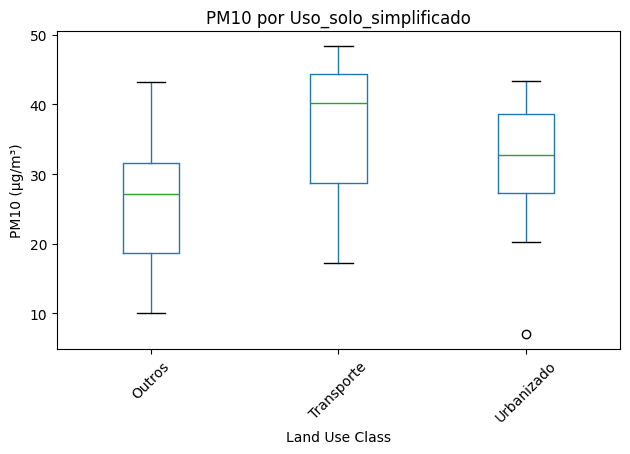

<Figure size 800x500 with 0 Axes>

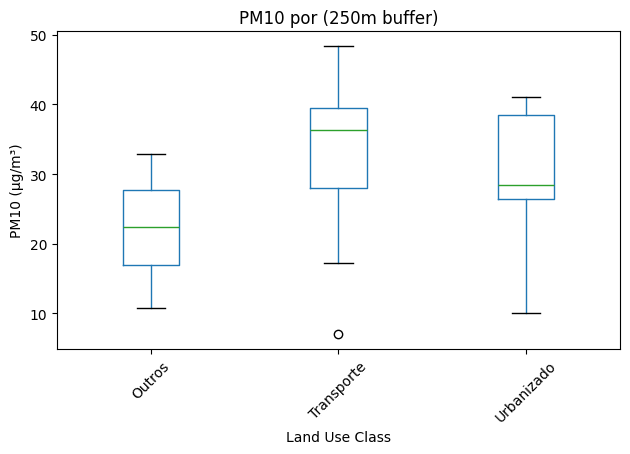

<Figure size 800x500 with 0 Axes>

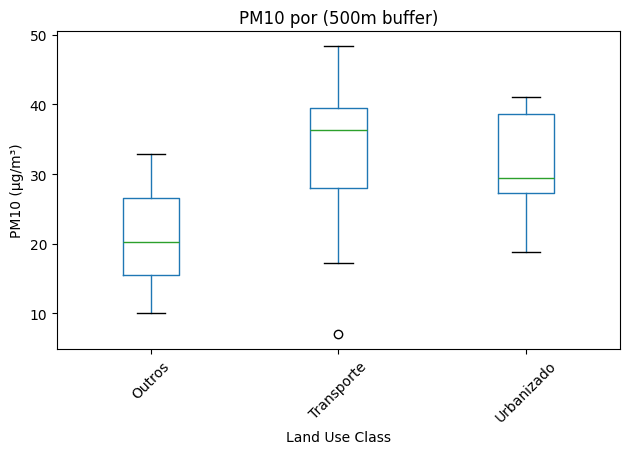

<Figure size 800x500 with 0 Axes>

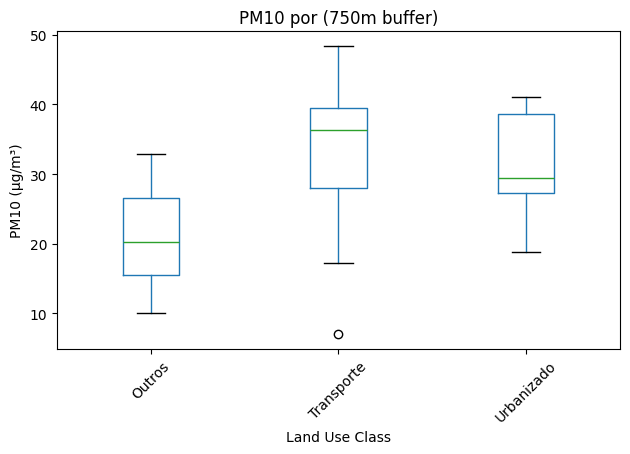

<Figure size 800x500 with 0 Axes>

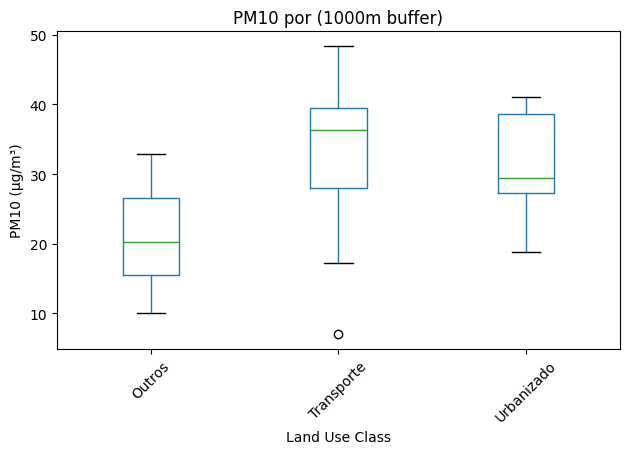

In [95]:

class_columns = [
    "Uso_solo_simplificado",
    "Uso_solo_simplificado_250m",
    "Uso_solo_simplificado_500m",
    "Uso_solo_simplificado_750m",
    "Uso_solo_simplificado_1000m"
]

titles = [
    "PM10 por Uso_solo_simplificado",
    "PM10 por (250m buffer)",
    "PM10 por (500m buffer)",
    "PM10 por (750m buffer)",
    "PM10 por (1000m buffer)"
]

# Loop and plot each boxplot
for col, title in zip(class_columns, titles):
    data = longtable_with_class[[col, "pm10"]].dropna()
    data.columns = ["Class", "PM10"]

    plt.figure(figsize=(8, 5))
    data.boxplot(by="Class", column="PM10", grid=False)
    plt.title(title)
    plt.suptitle("")
    plt.xlabel("Land Use Class")
    plt.ylabel("PM10 (µg/m³)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
